# Experiment 1: Growth of Stable Attractor Fields in Linear CBNs# Principal

In [17]:
import pandas as pd

# Leer los datasets
exp1_df = pd.read_csv("../1_networks_linear/outputs/exp1_linear_aleatory_3_11_1000/data.csv")
exp2_df = pd.read_csv("../2_networks_circular/outputs/exp2_circular_aleatory_3_10_1000/data.csv")
exp3_df = pd.read_csv("../3_variables_linear/outputs/exp3_variables_linear_5_30_1000/data.csv")
exp4_df = pd.read_csv("../4_variables_circular/outputs/exp4_variables_circular_5_30_1000/data.csv")
exp5_df = pd.read_csv("../5_networks_all/outputs/exp5_aleatory_linear_circle_3_9_1000/data.csv")
exp6_df = pd.read_csv("../6_aleatory_template_local_networks/outputs/exp6_data_3_9_1000/data.csv")
exp7_df = pd.read_csv("../7_aleatory_template_coupling_signals/outputs/exp7_data_3_8_1000/data.csv")
exp8_df = pd.read_csv("../8_variables_aleatory/outputs/exp8_data_5_20_1000/data.csv")

# Preprocessamento
exp7_df = exp7_df[exp7_df['n_local_networks'] >= 8]

# Lista de DataFrames y etiquetas
dataframes = [
    (exp1_df, "Exp. 1"),  # Formato personalizado para el primer experimento
    (exp2_df, "Exp. 2"),  # Actualizando nombres para consistencia
    (exp3_df, "Exp. 3"),
    (exp4_df, "Exp. 4"),
    (exp5_df, "Exp. 5"),
    (exp6_df, "Exp. 6"),
    (exp7_df, "Exp. 7"),
    (exp8_df, "Exp. 8"),
]

# Imprimir el número de columnas
for i, (df, label) in enumerate(dataframes, start=1):
    print(f"El DataFrame {label} tiene {df.shape[1]} columnas.")

# Columnas necesarias
columns = [
    'i_sample', 'n_local_networks', 'n_var_network', 'v_topology',
    'n_output_variables', 'n_clauses_function', 'n_local_attractors',
    'n_pair_attractors', 'n_attractor_fields', 'n_time_find_attractors',
    'n_time_find_pairs', 'n_time_find_fields'
]

# Procesar DataFrames
processed_dfs = []
for df, label in dataframes:
    # Validar que las columnas necesarias existen
    missing_columns = [col for col in columns if col not in df.columns]
    if missing_columns:
        print(f"Advertencia: El DataFrame {label} no contiene las columnas {missing_columns}")
        continue
    # Agregar columna del experimento y filtrar columnas necesarias
    df['experiment'] = label
    processed_dfs.append(df[columns + ['experiment']])

# Concatenar DataFrames
combined_df = pd.concat(processed_dfs, ignore_index=True)

# Mostrar las primeras filas del DataFrame combinado
combined_df.head()

El DataFrame Exp. 1 tiene 12 columnas.
El DataFrame Exp. 2 tiene 12 columnas.
El DataFrame Exp. 3 tiene 12 columnas.
El DataFrame Exp. 4 tiene 12 columnas.
El DataFrame Exp. 5 tiene 12 columnas.
El DataFrame Exp. 6 tiene 13 columnas.
El DataFrame Exp. 7 tiene 13 columnas.
El DataFrame Exp. 8 tiene 13 columnas.


,i_sample,n_local_networks,n_var_network,v_topology,n_output_variables,n_clauses_function,n_local_attractors,n_pair_attractors,n_attractor_fields,n_time_find_attractors,n_time_find_pairs,n_time_find_fields,experiment
0,1,3,5,4,2,2,5,3,1,0.130077,0.000102,0.000080,Exp. 1
1,1,4,5,4,2,2,7,5,1,0.219826,0.000152,0.000107,Exp. 1
2,1,5,5,4,2,2,9,7,1,0.358205,0.000196,0.000125,Exp. 1
3,1,6,5,4,2,2,11,9,1,0.409885,0.000344,0.000226,Exp. 1
4,1,7,5,4,2,2,13,11,1,0.487235,0.000288,0.000192,Exp. 1


## Analisys Total

In [18]:
# Calcular a soma total dos tempos por experimento
sumatoria_tiempos = combined_df.groupby('experiment')[[
    'n_time_find_attractors', 'n_time_find_pairs', 'n_time_find_fields'
]].sum()

# Adicionar a coluna de tempo total geral
sumatoria_tiempos['Tempo Total Geral'] = (
    sumatoria_tiempos['n_time_find_attractors'] +
    sumatoria_tiempos['n_time_find_pairs'] +
    sumatoria_tiempos['n_time_find_fields']
)

# Garantir precisão de duas casas decimais
sumatoria_tiempos = sumatoria_tiempos.round(2)

# Renomear as colunas para clareza
sumatoria_tiempos.columns = [
    'Atratores',
    'Pares',
    'Campos Atratores',
    'Tempo Total Geral'
]

# Resetar o índice para formatar como tabela
sumatoria_tiempos.reset_index(inplace=True)

# Gerar a tabela em LaTeX
latex_table_sumatoria = sumatoria_tiempos.to_latex(
    index=False,
    caption="Tempos Totais de Execução por Experimento",
    label="tab:tempos_totais_execucao",
    float_format="%.2f"
)

# Mostrar a tabela LaTeX no console
print(latex_table_sumatoria)

\begin{table}
\caption{Tempos Totais de Execução por Experimento}
\label{tab:tempos_totais_execucao}
\begin{tabular}{lrrrr}
\toprule
experiment & Atratores & Pares & Campos Atratores & Tempo Total Geral \\
\midrule
Exp. 1 & 6042.10 & 2.73 & 56819.11 & 62863.95 \\
Exp. 2 & 4319.94 & 1.99 & 33178.04 & 37499.97 \\
Exp. 3 & 89816.79 & 0.63 & 2470.09 & 92287.51 \\
Exp. 4 & 245494.30 & 2.24 & 96766.59 & 342263.13 \\
Exp. 5 & 16105.92 & 5.24 & 133287.50 & 149398.66 \\
Exp. 6 & 7081.31 & 2.28 & 587867.88 & 594951.47 \\
Exp. 7 & 8258.72 & 2.38 & 637115.96 & 645377.06 \\
Exp. 8 & 12303.96 & 1.11 & 410290.66 & 422595.74 \\
\bottomrule
\end{tabular}
\end{table}



# Analisys Mean

In [19]:
import pandas as pd

# Calcular as médias dos tempos por experimento
mean_summary = combined_df.groupby('experiment')[[
    'n_time_find_attractors', 'n_time_find_pairs', 'n_time_find_fields'
]].mean()

# Adicionar a coluna de tempo médio total
mean_summary['Tempo Médio Total'] = (
    mean_summary['n_time_find_attractors'] +
    mean_summary['n_time_find_pairs'] +
    mean_summary['n_time_find_fields']
)

# Garantir precisão de duas casas decimais
mean_summary = mean_summary.round(2)

# Renomear colunas para clareza
mean_summary.columns = [
    'Tempo Médio (Atratores)',
    'Tempo Médio (Pares)',
    'Tempo Médio (Campos Atratores)',
    'Tempo Médio Total'
]

# Resetar índice para formatar como tabela
mean_summary.reset_index(inplace=True)

# Gerar a tabela em LaTeX
latex_table_mean = mean_summary.to_latex(
    index=False,
    caption="Tempos Médios de Execução por Experimento",
    label="tab:tempos_medios_execucao",
    float_format="%.2f"  # Garantir formato de dois decimais
)

# Mostrar a tabela LaTeX no console
print(latex_table_mean)

\begin{table}
\caption{Tempos Médios de Execução por Experimento}
\label{tab:tempos_medios_execucao}
\begin{tabular}{lrrrr}
\toprule
experiment & Tempo Médio (Atratores) & Tempo Médio (Pares) & Tempo Médio (Campos Atratores) & Tempo Médio Total \\
\midrule
Exp. 1 & 0.67 & 0.00 & 6.31 & 6.98 \\
Exp. 2 & 0.54 & 0.00 & 4.15 & 4.69 \\
Exp. 3 & 14.97 & 0.00 & 0.41 & 15.38 \\
Exp. 4 & 40.92 & 0.00 & 16.13 & 57.04 \\
Exp. 5 & 0.77 & 0.00 & 6.35 & 7.11 \\
Exp. 6 & 1.01 & 0.00 & 83.98 & 84.99 \\
Exp. 7 & 1.65 & 0.00 & 127.42 & 129.08 \\
Exp. 8 & 3.08 & 0.00 & 102.57 & 105.65 \\
\bottomrule
\end{tabular}
\end{table}



# Analisys Maximun values

In [20]:
# MAIOR TEMPO

# Criar uma nova coluna para o tempo total de execução
combined_df['tempo_total'] = (
    combined_df['n_time_find_attractors'] 
    + combined_df['n_time_find_pairs'] 
    + combined_df['n_time_find_fields']
)

# Encontrar a RBA com maior tempo total para cada experimento
summary = (
    combined_df.loc[
        combined_df.groupby('experiment')['tempo_total'].idxmax(),
        ['experiment', 'n_time_find_attractors', 'n_time_find_pairs', 'n_time_find_fields', 'tempo_total']
    ]
)

# Renomear colunas para deixar mais claro
summary.columns = ['Experimento', 'Tempo (Atratores)', 'Tempo (Pares)', 'Tempo (Campos Atratores)', 'Tempo Máximo Total']

# Resetar índice para formatar como tabela
summary.reset_index(drop=True, inplace=True)

# Garantir precisão de duas casas decimais formatando como strings
for col in ['Tempo (Atratores)', 'Tempo (Pares)', 'Tempo (Campos Atratores)', 'Tempo Máximo Total']:
    summary[col] = summary[col].map(lambda x: f"{x:.2f}")

# Gerar a tabela em LaTeX
latex_table = summary.to_latex(
    index=False, 
    caption="Tempos de Execução por Experimento (Máximo Total)", 
    label="tab:tempos_execucao_maximo"
)

# Mostrar a tabela LaTeX no console
print(latex_table)


\begin{table}
\caption{Tempos de Execução por Experimento (Máximo Total)}
\label{tab:tempos_execucao_maximo}
\begin{tabular}{lllll}
\toprule
Experimento & Tempo (Atratores) & Tempo (Pares) & Tempo (Campos Atratores) & Tempo Máximo Total \\
\midrule
Exp. 1 & 2.30 & 0.00 & 26622.89 & 26625.20 \\
Exp. 2 & 1.96 & 0.00 & 9125.52 & 9127.48 \\
Exp. 3 & 32194.11 & 0.00 & 72.98 & 32267.09 \\
Exp. 4 & 147552.28 & 0.00 & 57.16 & 147609.44 \\
Exp. 5 & 3.39 & 0.00 & 30657.26 & 30660.65 \\
Exp. 6 & 3.51 & 0.00 & 230902.72 & 230906.24 \\
Exp. 7 & 4.71 & 0.00 & 218578.01 & 218582.72 \\
Exp. 8 & 89.33 & 0.00 & 352917.58 & 353006.92 \\
\bottomrule
\end{tabular}
\end{table}



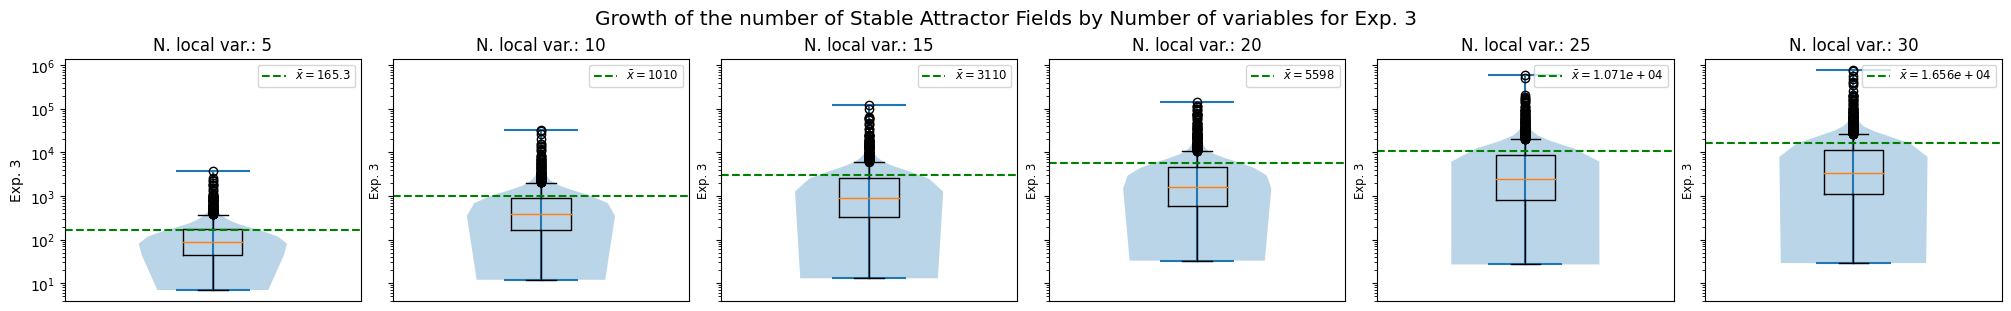

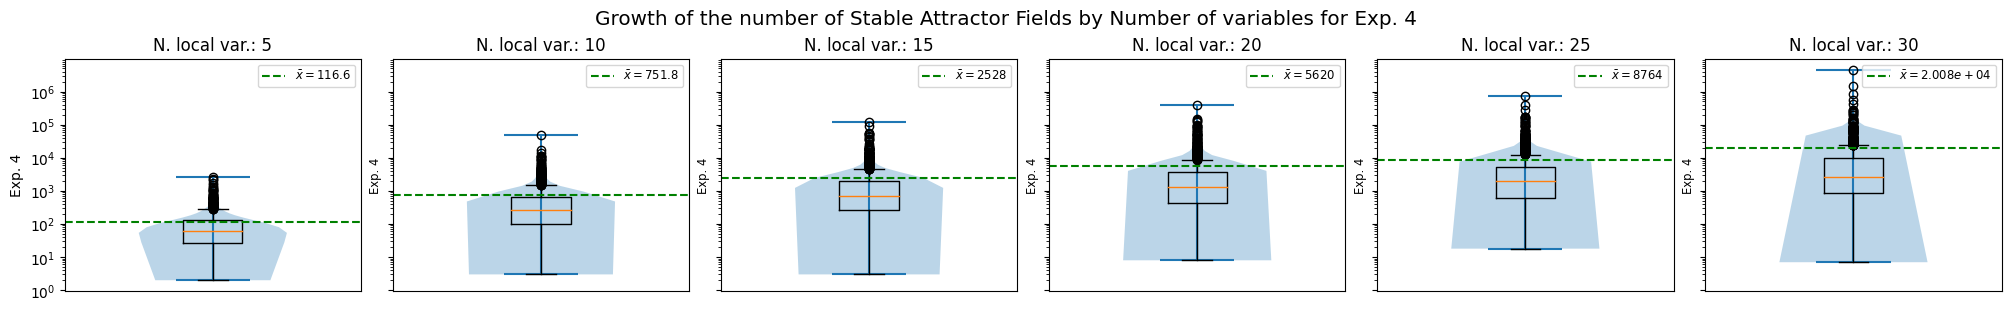

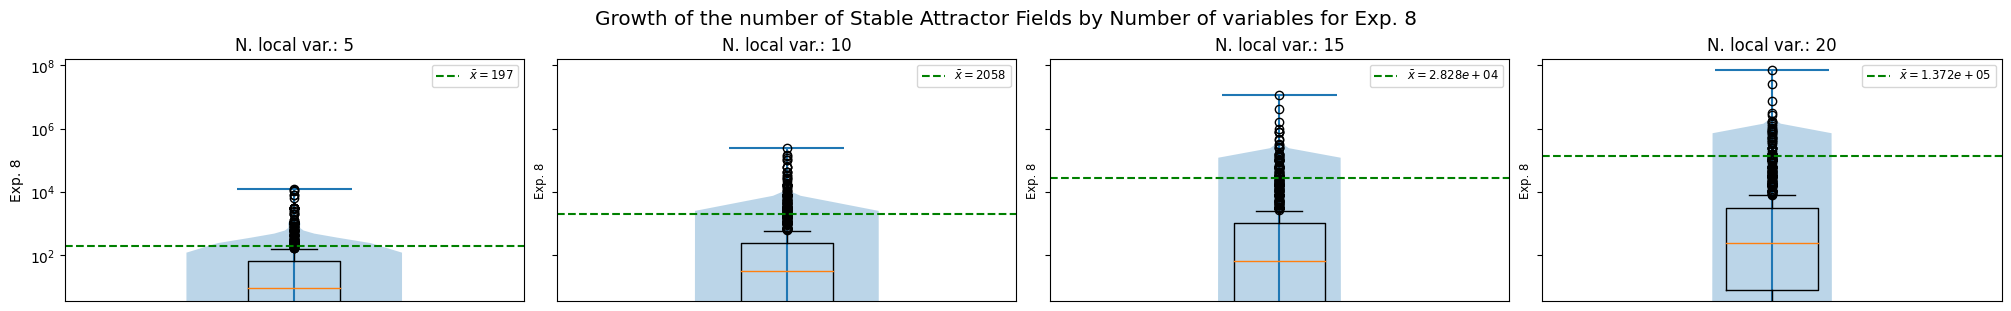

In [21]:
from matplotlib import pyplot as plt

# Filter dataset to include only phd_experiments 3, 4, and 8
filtered_df_violin = combined_df[combined_df['experiment'].isin(['Exp. 3', 'Exp. 4', 'Exp. 8'])]

# Violin graphs focusing on 'n_attractor_fields' for the selected phd_experiments
experiments = ['Exp. 3', 'Exp. 4', 'Exp. 8']
attribute = 'n_attractor_fields'
attribute_label = 'Growth of the number of Stable Attractor Fields by Number of variables'

for exp in experiments:
    exp_data = filtered_df_violin[filtered_df_violin['experiment'] == exp]

    # Determine unique and sorted 'n_var_network' values for the current experiment
    n_var_networks_sorted = sorted(exp_data['n_var_network'].unique())

    # Create a figure with subplots: one for each 'n_var_network' value
    fig, axs = plt.subplots(1, len(n_var_networks_sorted),
                            sharey=True, figsize=(20, 3), constrained_layout=True)

    for col, n_var_network in enumerate(n_var_networks_sorted):
        ax = axs[col] if len(n_var_networks_sorted) > 1 else axs

        # Filter data for the current 'n_var_network' value
        data = exp_data[exp_data['n_var_network'] == n_var_network][attribute]

        if not data.empty:
            # Plot violin and box plots
            ax.violinplot(data)
            ax.boxplot(data, widths=0.2)

            # Plot mean as a horizontal line
            mean = data.mean()
            ax.axhline(mean, color='g', ls='--', label=fr'$\bar{{x}}={mean:.4g}$')
            ax.legend(fontsize='small')

        # Set labels for the current subplots
        ax.set_title(f'N. local var.: {n_var_network}')
        ax.set_ylabel(f'{exp}', fontsize='medium' if col == 0 else 'small')

        # Apply logarithmic scale to the y-axis
        ax.set_yscale('log')
        ax.set_xticks([])
        ax.set_xlim((0.5, 1.5))

    # Add a main title for the current experiment
    fig.suptitle(f'{attribute_label} for {exp}', fontsize='x-large')
    plt.show()
